In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import customtkinter as ctk
import tkinter as tk
from tkinter import messagebox

In [2]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

C:\Users\honey\AppData\Local\Temp\ipykernel_97028\1468567201.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fake = pd.read_csv('Fake.csv')


In [3]:
data_fake["class"]=0
data_true['class']=1

In [4]:
data_merge= pd.concat([data_fake, data_true], axis=0)

In [5]:
data = data_merge.drop(['title', 'subject', 'data'], axis=1, errors='ignore')

In [6]:
data=data.sample(frac=1)

In [7]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

In [8]:
def wordopt(txt):
    text = txt.lower()
    text = re.sub(r'\[.*?&\]', '', txt)
    text = re.sub(r'\W', ' ', txt)
    text = re.sub(r'https?://\S+|www\.\S+', '', txt)
    text = re.sub(r'<~`*?>+', '', txt)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', txt)
    text = re.sub(r'\w*\d\w*', '', txt)
    
    # remove stopwords
    sw = pd.read_csv('stopwords.csv', header=None)[0].tolist() 
    text = ' '.join([w for w in txt.split() if w not in sw])

    return text

In [9]:
data['text']=data['text'].apply(wordopt)

In [10]:
x=data['text']
y=data['class']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xv_train, y_train)

LogisticRegression()

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=0)
gb.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)
rf.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
lr_predict=lr.predict(xv_test)

In [18]:
dt_predict=dt.predict(xv_test)

In [19]:
gb_predict=gb.predict(xv_test)

In [20]:
rf_predict=rf.predict(xv_test)

In [21]:
lr.score(xv_test, y_test)

0.9869991095280498

In [22]:
dt.score(xv_test, y_test)

0.9949243098842386

In [23]:
gb.score(xv_test, y_test)

0.9947462154942119

In [24]:
rf.score(xv_test, y_test)

0.992252894033838

In [25]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def mannual(news):
    news_testing= {"text": [news]}
    def_test=pd.DataFrame(news_testing)
    def_test["text"]= def_test["text"].apply(wordopt)
    newx_test=def_test["text"]
    newxv_text=vect.transform(newx_test)
    lr_predict=lr.predict(newxv_text)
    dt_predict=dt.predict(newxv_text)
    gb_predict=gb.predict(newxv_text)
    rf_predict=rf.predict(newxv_text)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {} ".format(output_lable(lr_predict[0]),output_lable(dt_predict[0]), output_lable(gb_predict[0]),output_lable(rf_predict[0])))

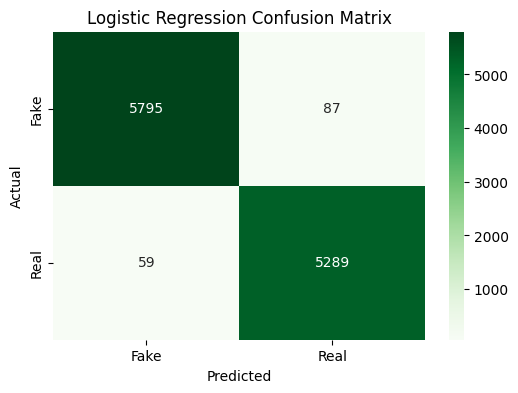

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

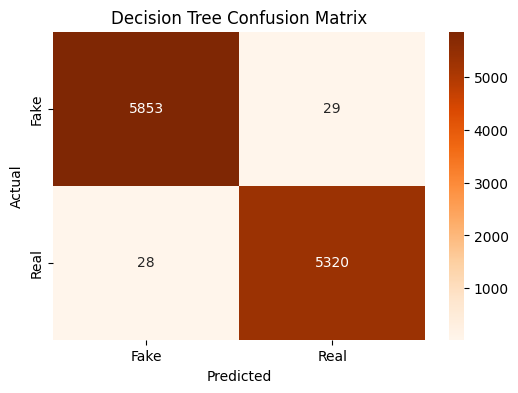

In [27]:
cm = confusion_matrix(y_test, dt_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

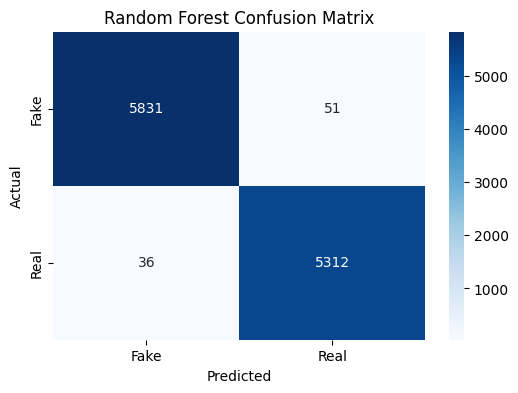

In [28]:
cm = confusion_matrix(y_test, rf_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

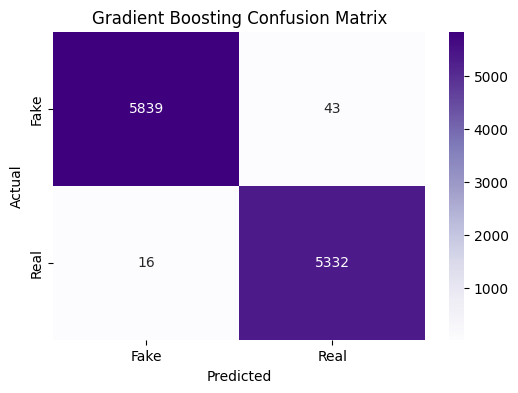

In [29]:
cm = confusion_matrix(y_test, gb_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

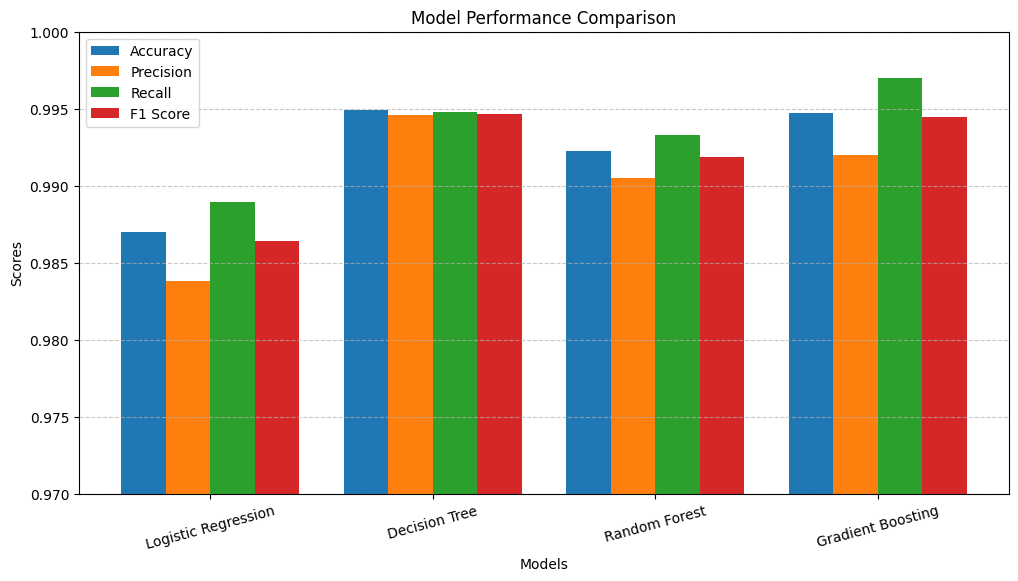

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy = [
    accuracy_score(y_test, lr_predict),
    accuracy_score(y_test, dt_predict),
    accuracy_score(y_test, rf_predict),
    accuracy_score(y_test, gb_predict)
]
precision = [
    precision_score(y_test, lr_predict),
    precision_score(y_test, dt_predict),
    precision_score(y_test, rf_predict),
    precision_score(y_test, gb_predict)
]
recall = [
    recall_score(y_test, lr_predict),
    recall_score(y_test, dt_predict),
    recall_score(y_test, rf_predict),
    recall_score(y_test, gb_predict)
]
f1 = [
    f1_score(y_test, lr_predict),
    f1_score(y_test, dt_predict),
    f1_score(y_test, rf_predict),
    f1_score(y_test, gb_predict)
]

x = np.arange(len(models))
w = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*w, accuracy, w, label='Accuracy')
plt.bar(x - 0.5*w, precision, w, label='Precision')
plt.bar(x + 0.5*w, recall, w, label='Recall')
plt.bar(x + 1.5*w, f1, w, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0.97, 1.00)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

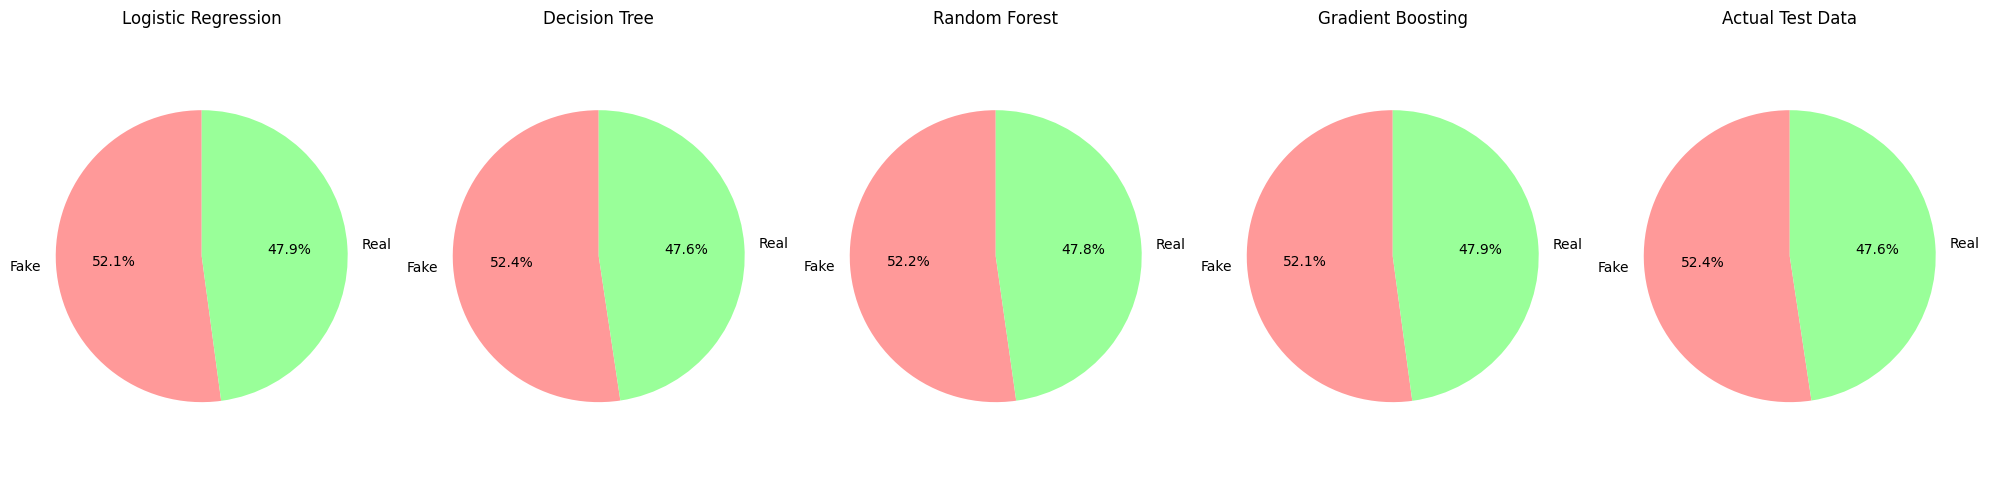

In [31]:
import matplotlib.pyplot as plt
import numpy as np

preds = {
    'Logistic Regression': lr_predict,
    'Decision Tree': dt_predict,
    'Random Forest': rf_predict,
    'Gradient Boosting': gb_predict,
    'Actual Test Data': y_test
}

fig, axes = plt.subplots(1, 5, figsize=(20,5))
colors = ['#FF9999','#99FF99']

for ax, (name, pred) in zip(axes, preds.items()):
    unique, counts = np.unique(pred, return_counts=True)
    labels = ['Fake', 'Real']
    sizes = counts

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(name)
    ax.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
def OutputLabel(n):
    return "Fake News" if n == 0 else "Correct News"

def PredictNews():
    news = news_input.get("1.0", "end").strip()
    if not news:
        result_label.configure(text="Please enter news text.")
        return
    try:
        test_df = pd.DataFrame({"text": [news]})
        test_df["text"] = test_df["text"].apply(wordopt)
        test_x = vect.transform(test_df["text"])
        preds = {
            "Logistic Regression": OutputLabel(lr.predict(test_x)[0]),
            "Decision Tree": OutputLabel(dt.predict(test_x)[0]),
            "Gradient Boosting": OutputLabel(gb.predict(test_x)[0]),
            "Random Forest": OutputLabel(rf.predict(test_x)[0])
        }
        result = "\n".join([f"{k}: {v}" for k, v in preds.items()])
        result_label.configure(text=result)
    except Exception as e:
        result_label.configure(text=f"Error: {str(e)}")

# GUI Init
ctk.set_appearance_mode("System")
ctk.set_default_color_theme("blue")
app = ctk.CTk()
app.title("Fake News Detector")
app.geometry("800x600")

# Main Frame
main_frame = ctk.CTkFrame(app)
main_frame.pack(padx=20, pady=20, fill="both", expand=True)

# Title
title_label = ctk.CTkLabel(main_frame, text="Fake News Detector", font=("Arial", 24, "bold"))
title_label.pack(pady=10)

# Input Label
input_label = ctk.CTkLabel(main_frame, text="    Enter News Text:", font=("Arial", 16))
input_label.pack(pady=(20, 5), anchor="w")

# Textbox
news_input = ctk.CTkTextbox(main_frame, height=200)
news_input.pack(padx=10,pady=10, fill="both", expand=True)

# Button
predict_button = ctk.CTkButton(main_frame, text="Predict", command=PredictNews)
predict_button.pack(pady=20)

# Result Frame
result_frame = ctk.CTkFrame(main_frame)
result_frame.pack(pady=10, fill="x")

result_label = ctk.CTkLabel(result_frame, text="Enter news text and click Predict", font=("Arial", 18))
result_label.pack(pady=20)

# Run
if __name__ == "__main__":
    app.mainloop()